In [3]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

---------------DATA CLEANING---------------

In [4]:
misiones = pd.read_csv("Space_Corrected.csv")

In [5]:
misiones.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
misiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
print(misiones.isnull().sum())

Unnamed: 0.1         0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64


We can see that the Rocket column has 3360 null data, which, being numbers, we could replace the NaN value with 0 and thus avoid deleting data.

In [8]:
print(misiones.duplicated().sum())

0


In [9]:
misiones.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


In [10]:
misiones.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [11]:
#replace null data for 0
misiones[' Rocket'].fillna(0, inplace=True)
misiones.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [12]:
#We apply format to the datum column and create 3 columns that contain, year, month and days of the week
misiones["date"] = pd.to_datetime(misiones["Datum"], format= "%a %b %d, %Y %H:%M %Z", errors= "coerce")
misiones["year"] = misiones["date"].apply(lambda datetime: datetime.year)
misiones["month"] = misiones["date"].apply(lambda datetime: datetime.month)
misiones["weekday"] = misiones["date"].apply(lambda datetime: datetime.weekday())

misiones.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,month,weekday
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,4.0
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,3.0
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,1.0
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,3.0
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,3.0


In [13]:
#we eliminate unnamed 0.1 and unnamed 0
misiones = misiones.drop(["Unnamed: 0.1"], axis=1)
misiones = misiones.drop(["Unnamed: 0"], axis=1)
misiones.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,month,weekday
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,4.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,3.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,1.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,3.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,3.0


In [14]:
#We filter the data to know which companies made the most launches, which is why they are the ones that have the most money invested in launches.
lanzamientos = misiones['Company Name'].value_counts()
lanzamientos.head()

Company Name
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
Name: count, dtype: int64

---------------------------DATA VISUALIZATION-----------------------------

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'RVSN USSR'),
  Text(1, 0, 'Arianespace'),
  Text(2, 0, 'CASC'),
  Text(3, 0, 'General Dynamics'),
  Text(4, 0, 'NASA'),
  Text(5, 0, 'VKS RF'),
  Text(6, 0, 'US Air Force'),
  Text(7, 0, 'ULA'),
  Text(8, 0, 'Boeing'),
  Text(9, 0, 'Martin Marietta'),
  Text(10, 0, 'SpaceX'),
  Text(11, 0, 'MHI'),
  Text(12, 0, 'Northrop'),
  Text(13, 0, 'Lockheed'),
  Text(14, 0, 'ISRO'),
  Text(15, 0, 'Roscosmos'),
  Text(16, 0, 'ILS'),
  Text(17, 0, 'Sea Launch'),
  Text(18, 0, 'ISAS'),
  Text(19, 0, 'Kosmotras')])

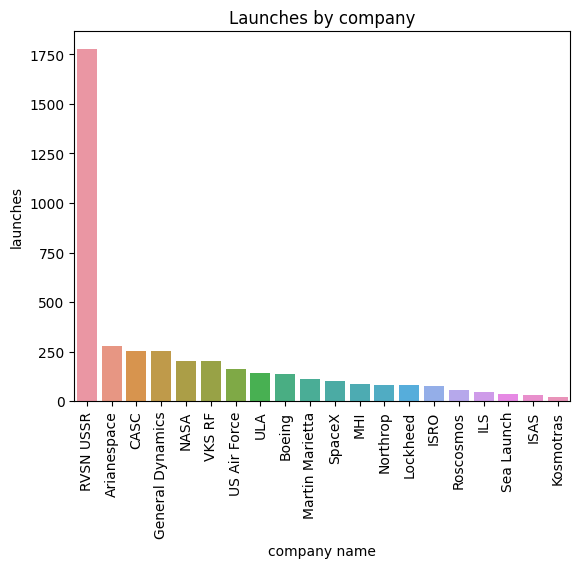

In [15]:
#we created a bar chart to compare the number of launches by company
data = pd.DataFrame({'Lanzamientos': lanzamientos.index, 'company name': lanzamientos.values}).head(20)
sns.barplot(data=data, x='Lanzamientos', y='company name')
plt.title('Launches by company')
plt.xlabel('company name')
plt.ylabel('launches')
plt.xticks(rotation=90)

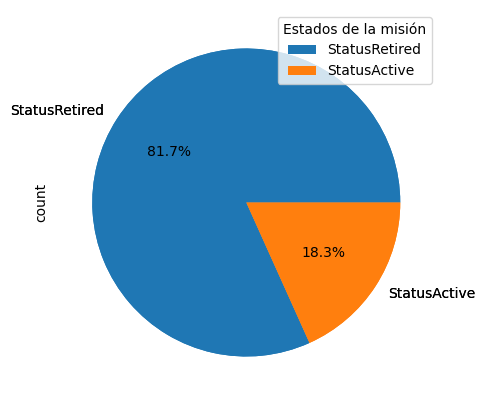

In [16]:
#We observe the number of rockets that are active
activos = misiones["Status Rocket"].value_counts()
plt.figure(figsize=(5,5))
activos.plot.pie()
plt.rcParams['font.size'] = 10
activos.plot.pie(autopct='%1.1f%%')
plt.legend(activos.index, title="Estados de la misión", loc="upper right")
plt.show()

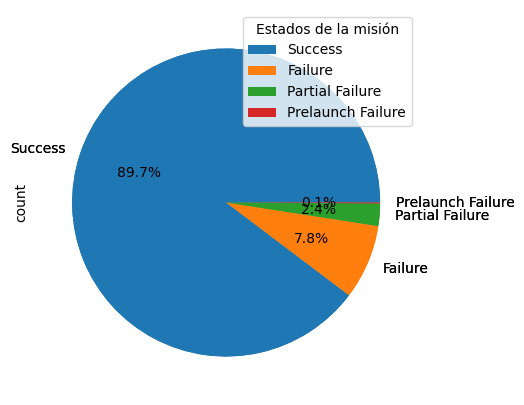

In [17]:
#Percentage of mission status
activos = misiones["Status Mission"].value_counts()
plt.figure(figsize=(5,5))
activos.plot.pie()
plt.rcParams['font.size'] = 10
activos.plot.pie(autopct='%1.1f%%')
plt.legend(activos.index, title="Estados de la misión", loc="upper right")
plt.show()

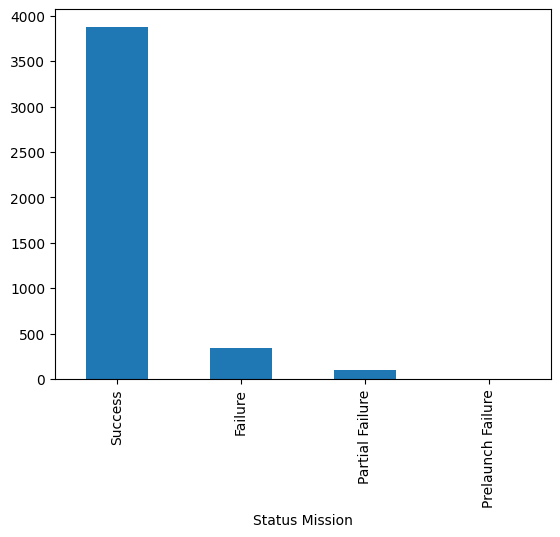

In [18]:
#comparison according to the status of the missions
activos = misiones["Status Mission"].value_counts().plot.bar()

In [19]:
misiones.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,month,weekday
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,4.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,3.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,1.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,3.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,3.0


(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250')])

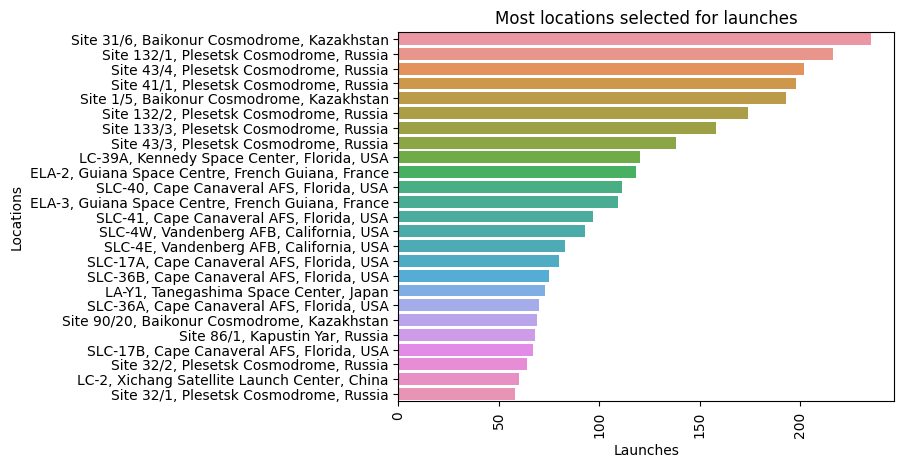

In [20]:
#Comparison of the most used locations for launches
sitios = misiones['Location'].value_counts().head(25)
sitio_data = pd.DataFrame({'locations':sitios.index, 'count': sitios.values})
sns.barplot(data=sitio_data, x='count', y='locations')
plt.title("Most locations selected for launches")
plt.xlabel('Launches')
plt.ylabel('Locations')
plt.xticks(rotation=90)

In [21]:
#Companies with greater scope of missions, which translates into positive investments since what was proposed was fulfilled.
succes_missions = misiones[misiones["Status Mission"] == "Success"]

succes_counts = succes_missions.groupby("Company Name").size()

succes_counts = succes_counts.sort_values(ascending=False)

print(succes_counts)

Company Name
RVSN USSR           1614
Arianespace          269
CASC                 231
General Dynamics     203
VKS RF               188
NASA                 186
ULA                  139
Boeing               131
US Air Force         129
Martin Marietta      100
SpaceX                94
MHI                   80
Northrop              74
Lockheed              74
ISRO                  63
Roscosmos             51
ILS                   45
Sea Launch            33
ISAS                  26
Kosmotras             21
Blue Origin           12
Eurockot              12
Rocket Lab            11
IAI                    9
ESA                    9
ASI                    9
ExPace                 9
Land Launch            6
MITT                   6
CNES                   6
JAXA                   6
ISA                    4
AMBA                   4
CASIC                  3
Arm??e de l'Air        3
KCST                   2
US Navy                2
Yuzhmash               2
OKB-586                2
SRC         

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400'),
  Text(1600.0, 0, '1600'),
  Text(1800.0, 0, '1800')])

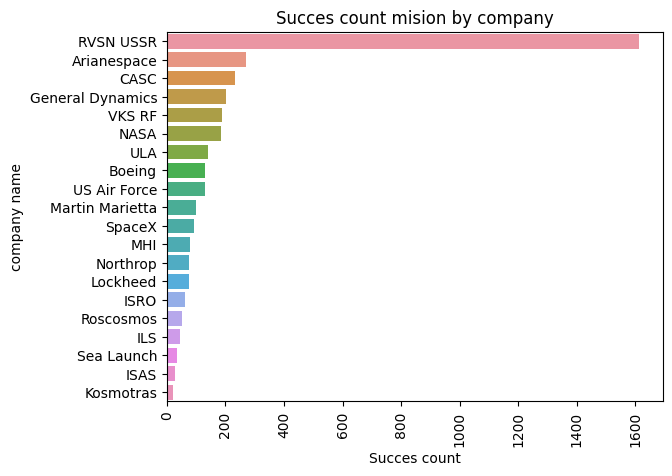

In [22]:
#count of successful missions by company
succes_grap = pd.DataFrame({'company name': succes_counts.index, 'status': succes_counts.values}).head(20)
sns.barplot(data=succes_grap, x='status', y='company name')
plt.title("Succes count mision by company")
plt.xlabel("Succes count")
plt.ylabel("company name")
plt.xticks(rotation=90)

In [23]:
#Companies with the greatest mission failure, which translates into losses
failure_missions = misiones[misiones["Status Mission"] == "Failure"]

failure_counts = failure_missions.groupby("Company Name").size()

failure_counts = failure_counts.sort_values(ascending=False)

print(failure_counts)

Company Name
RVSN USSR           121
General Dynamics     37
US Air Force         30
CASC                 14
US Navy              14
NASA                 11
Martin Marietta      11
ISRO                  8
ISA                   8
Arianespace           7
Northrop              7
VKS RF                7
Lockheed              5
UT                    4
SpaceX                4
Sea Launch            3
KCST                  3
AMBA                  3
Roscosmos             3
ISAS                  3
ESA                   3
CECLES                3
Boeing                3
KARI                  2
Rocket Lab            2
IAI                   2
MHI                   2
CNES                  2
CASIC                 2
AEB                   2
Sandia                1
SRC                   1
Kosmotras             1
RAE                   1
OneSpace              1
MITT                  1
Landspace             1
JAXA                  1
Exos                  1
ExPace                1
Eurockot              1
EER

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

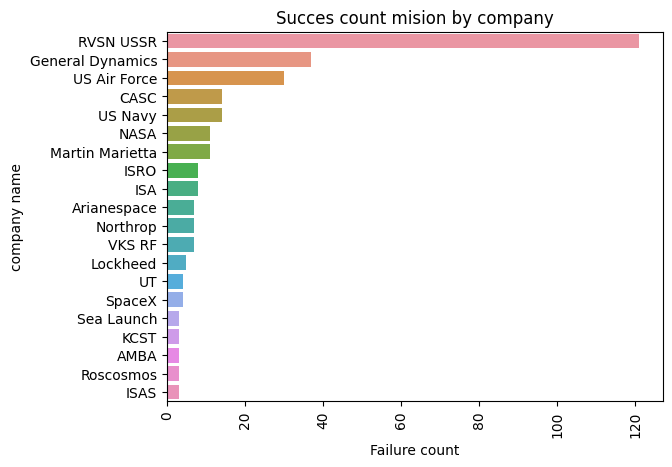

In [24]:
failure_grap = pd.DataFrame({'company name': failure_counts.index, 'status': failure_counts.values}).head(20)
sns.barplot(data=failure_grap, x='status', y='company name')
plt.title("Succes count mision by company")
plt.xlabel("Failure count")
plt.ylabel("company name")
plt.xticks(rotation=90)

WE CAN DETERMINE THAT RVSN USSR HAS NOT ONLY HAS A GREATER NUMBER OF LAUNCHES COMPARED TO OTHER COMPANIES, BUT ALSO HAS THE HIGHEST NUMBER OF SUCCESSFUL AND FAILED LAUNCHES, POSITIONING IT AS THE COMPANY THAT HAS THE MOST ACTIVITY COMPARED TO THE REST OF THE COMPANIES

In [25]:
misiones.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,month,weekday
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,4.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,3.0
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,1.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,3.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,3.0


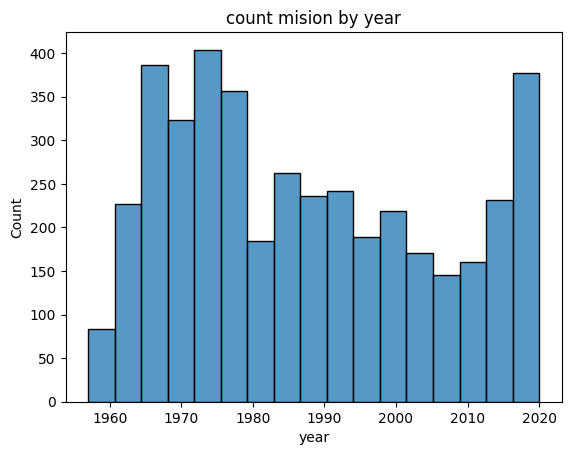

In [26]:
#evolution of the number of missions carried out over the years

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un histograma con Seaborn
sns.histplot(data=misiones, x="year", ax=ax)

# Configurar el título
ax.set_title("count mision by year")

# Mostrar la figura
plt.show()


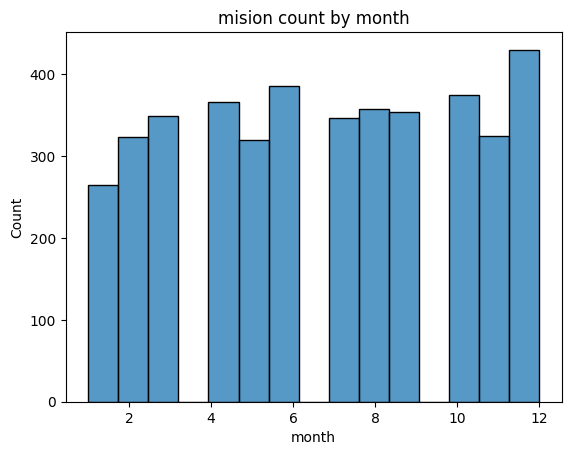

In [27]:
#histogram of missions by month

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un histograma con Seaborn
sns.histplot(data=misiones, x="month", ax=ax)

# Configurar el título
ax.set_title("mision count by month")

# Mostrar la figura
plt.show()


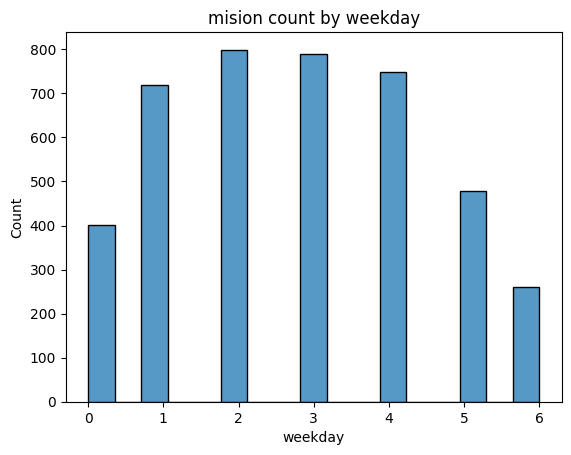

In [28]:
#Histogram of missions by weekly days

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un histograma con Seaborn
sns.histplot(data=misiones, x="weekday", ax=ax)

# Configurar el título
ax.set_title("mision count by weekday")

# Mostrar la figura
plt.show()


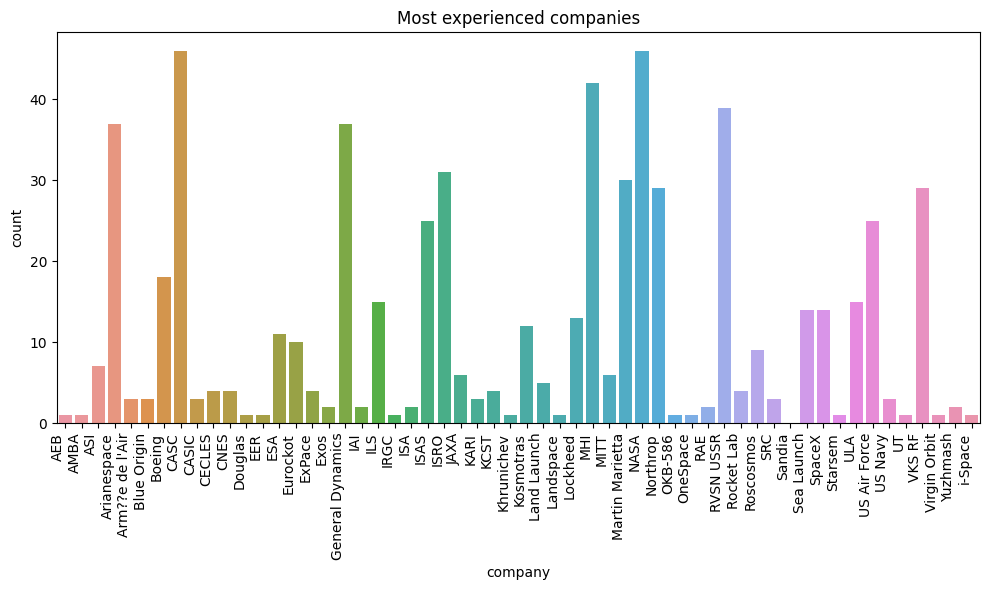

In [56]:
#companies with greater experience that this translates into greater experience

# Agrupar los datos y contar los años únicos para cada compañía
trayectoria = misiones.groupby(['Company Name'])['year'].nunique().reset_index()

# Renombrar las columnas
trayectoria.columns = ['company', 'count']

# Crear una figura y un eje con un tamaño más grande
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras con Seaborn
sns.barplot(data=trayectoria, x="company", y="count", ax=ax)

# Configurar el título
ax.set_title('Most experienced companies')

# Rotar las etiquetas del eje x a vertical y ajustar la separación
plt.xticks(rotation=90, ha='right')

# Ajustar la separación de las etiquetas del eje x
plt.tight_layout()

# Mostrar la figura
plt.show()



In [ ]:
misiones.head()

In [ ]:
#verify how the column names will be written, in order to avoid errors when making the codes
print(misiones.columns)

We can see that the Rocket column is written with a space, with this we confirm that at first glance the columns may seem to be well written but then when used in some code, it will present errors if we do not take into account how it is written

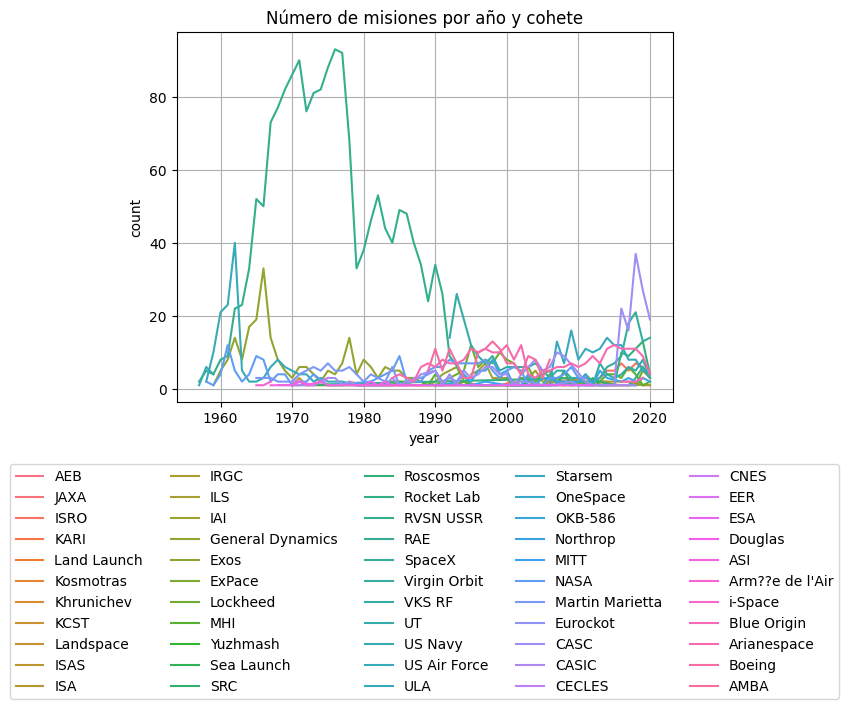

In [44]:
#growth of launches in each company over the years

# Agrupar los datos y contar el número de misiones por año y compañía
spent_year = misiones.groupby(['Company Name', 'year']).size().reset_index(name='count')

# Ordenar los datos
spent_year_sorted = spent_year.sort_values(by='count', ascending=True)

# Crear un gráfico de líneas con Seaborn
sns.lineplot(data=spent_year_sorted, x='year', y='count', hue='Company Name')

# Configurar el título
plt.title('Número de misiones por año y cohete')

# Mover la leyenda debajo del gráfico y hacerla horizontal
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)

# Agregar una cuadrícula de fondo al gráfico
plt.grid(True)

# Mostrar la figura
plt.show()


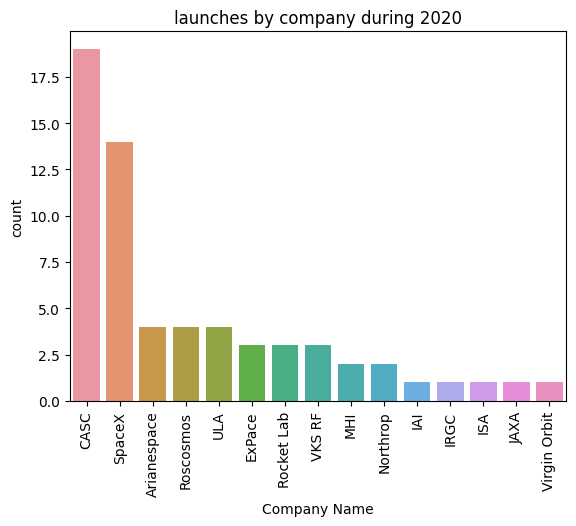

In [49]:
#launches by company during 2020

# Filtrar los datos para el año 2020
lanzamiento_2020 = misiones[misiones['year']== 2020]

# Agrupar los datos y contar el número de misiones por compañía
misiones_2020 = lanzamiento_2020.groupby(['Company Name']).size().reset_index(name='count')

# Ordenar los datos
misiones_2020_sorted = misiones_2020.sort_values(by='count', ascending=False)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un gráfico de barras con Seaborn
sns.barplot(data=misiones_2020_sorted, x='Company Name', y='count', ax=ax)

# Configurar el título
ax.set_title('launches by company during 2020')

# Rotar las etiquetas del eje x a vertical
plt.xticks(rotation=90)

# Mostrar la figura
plt.show()


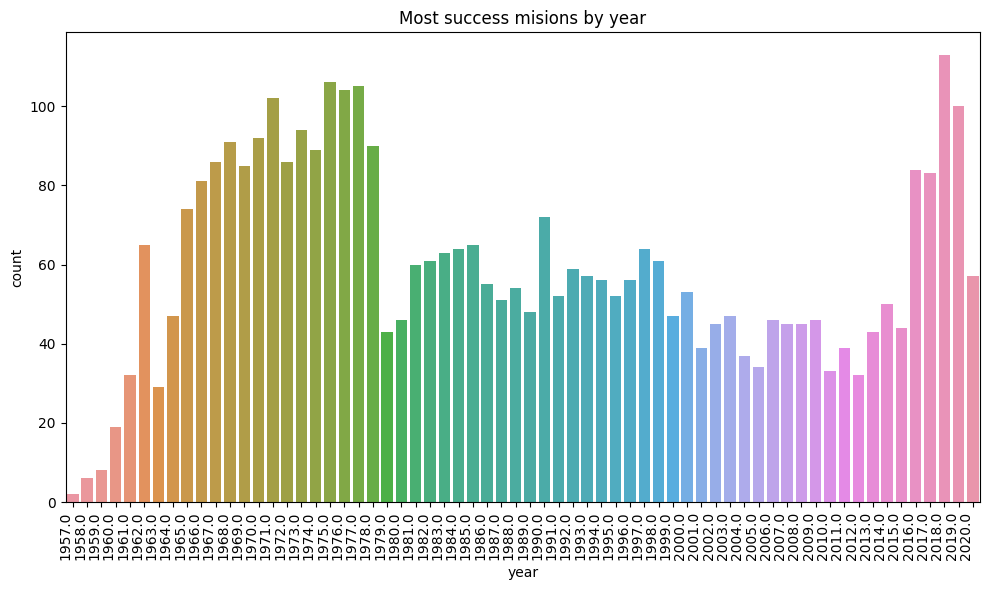

In [55]:
#year with the highest number of missions completed

# Filtrar los datos para las misiones exitosas
year_status = misiones[misiones['Status Mission'] == 'Success']

# Agrupar los datos y contar el número de misiones exitosas por año
success_year = year_status.groupby(['year']).size().reset_index(name='count')

# Ordenar los datos
success_year_sorted = success_year.sort_values(by='count', ascending=False)

# Crear una figura y un eje con un tamaño más grande
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras con Seaborn
sns.barplot(data=success_year_sorted, x='year', y='count', ax=ax)

# Configurar el título
ax.set_title('Most success misions by year')

# Rotar las etiquetas del eje x a vertical y ajustar la separación
plt.xticks(rotation=90, ha='right')

# Ajustar la separación de las etiquetas del eje x
plt.tight_layout()

# Mostrar la figura
plt.show()


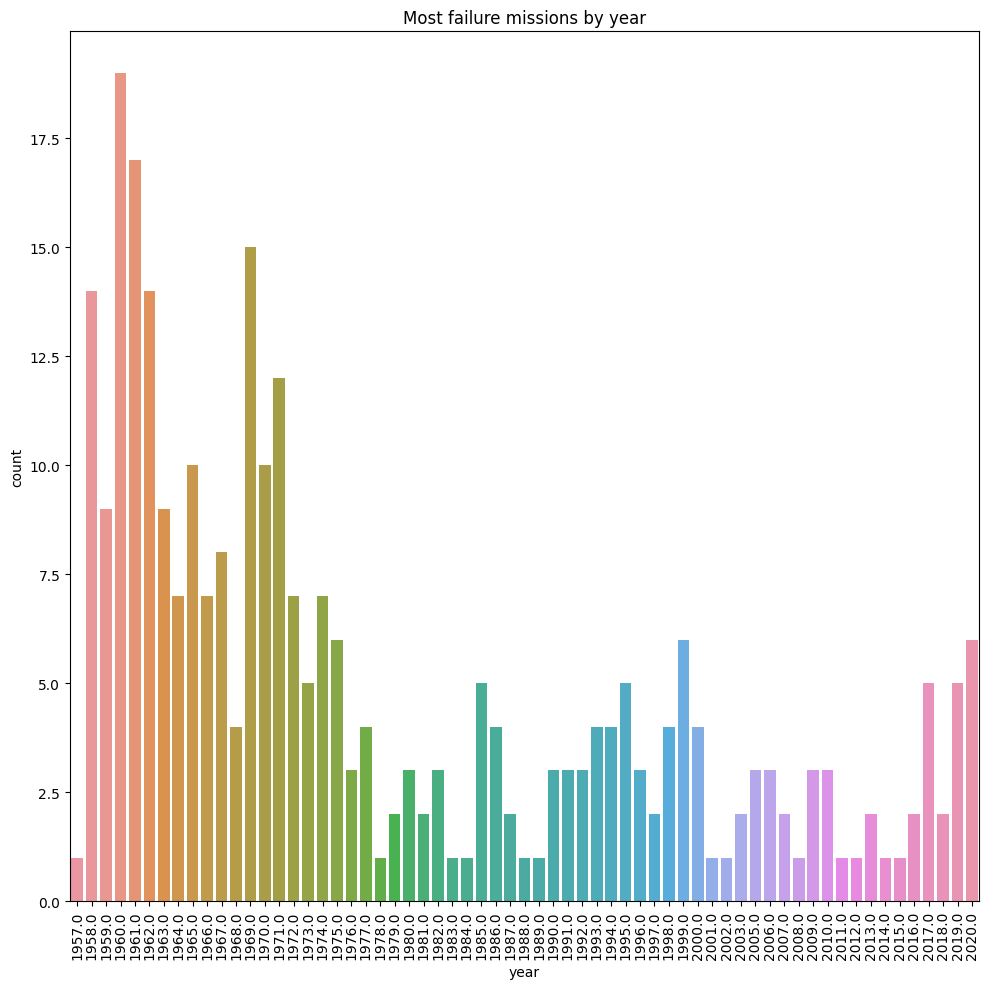

In [59]:
#year with the most failed missions
year_status_failure = misiones[misiones['Status Mission'] == 'Failure']

success_failure = year_status_failure.groupby(['year']).size().reset_index(name='count')

success_failure_sorted = success_failure.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 10))  # Ajusta el tamaño del gráfico
sns.barplot(x='year', y='count', data=success_failure_sorted)
plt.title('Most failure missions by year')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()




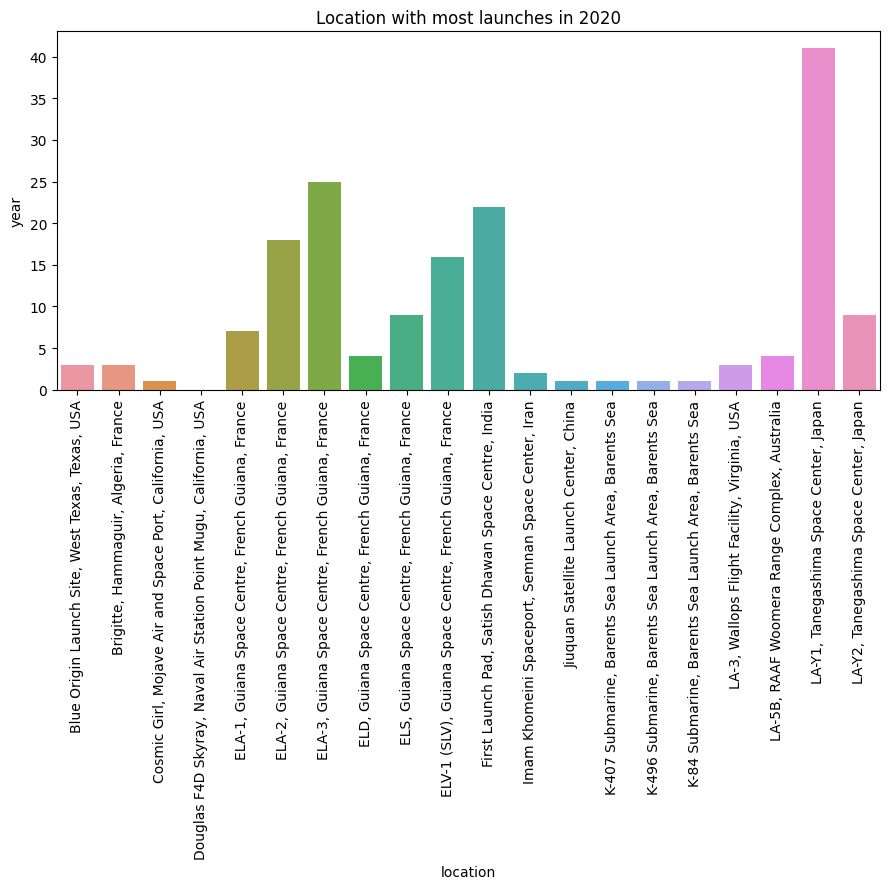

In [62]:
#location with most launches in 2020
year_location = misiones.groupby(['Location'])['year'].nunique().reset_index().head(20)

year_location.columns = [
    'location', 
    'year'
]

plt.figure(figsize=(9, 9))  # Ajusta el tamaño del gráfico
sns.barplot(x='location', y='year', data=year_location)
plt.title('Location with most launches in 2020')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()

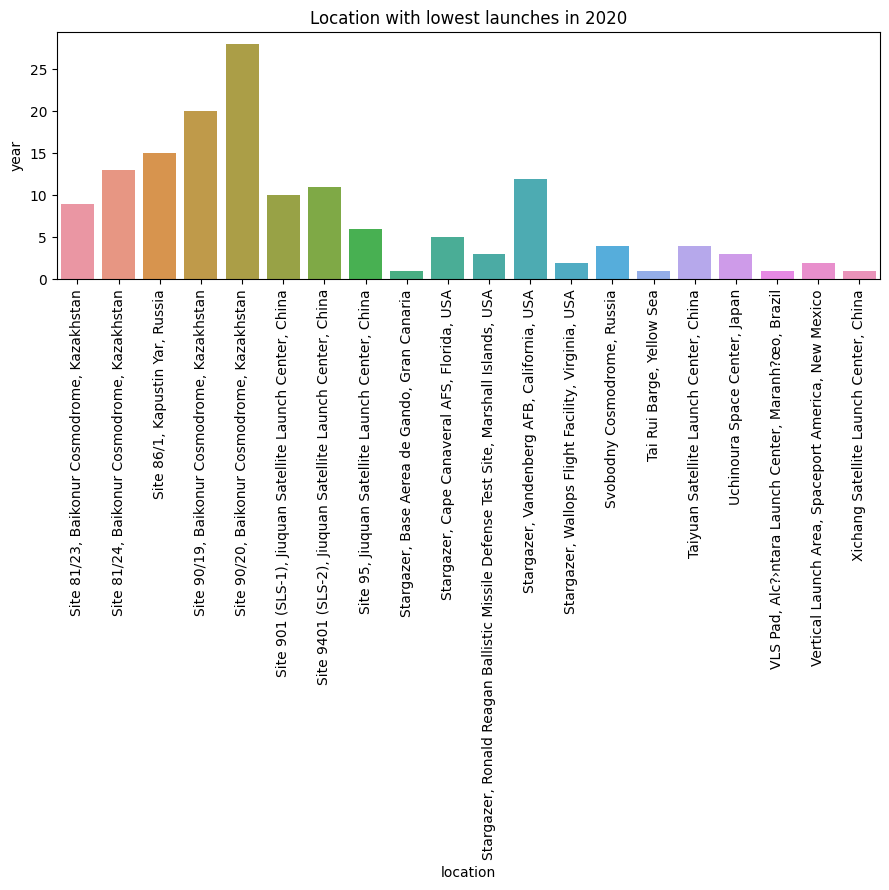

In [64]:
##location with lowest launches in 2020
year_location = misiones.groupby(['Location'])['year'].nunique().reset_index().tail(20)

year_location.columns = [
    'location', 
    'year'
]

plt.figure(figsize=(9, 9))  # Ajusta el tamaño del gráfico
sns.barplot(x='location', y='year', data=year_location)
plt.title('Location with lowest launches in 2020')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()


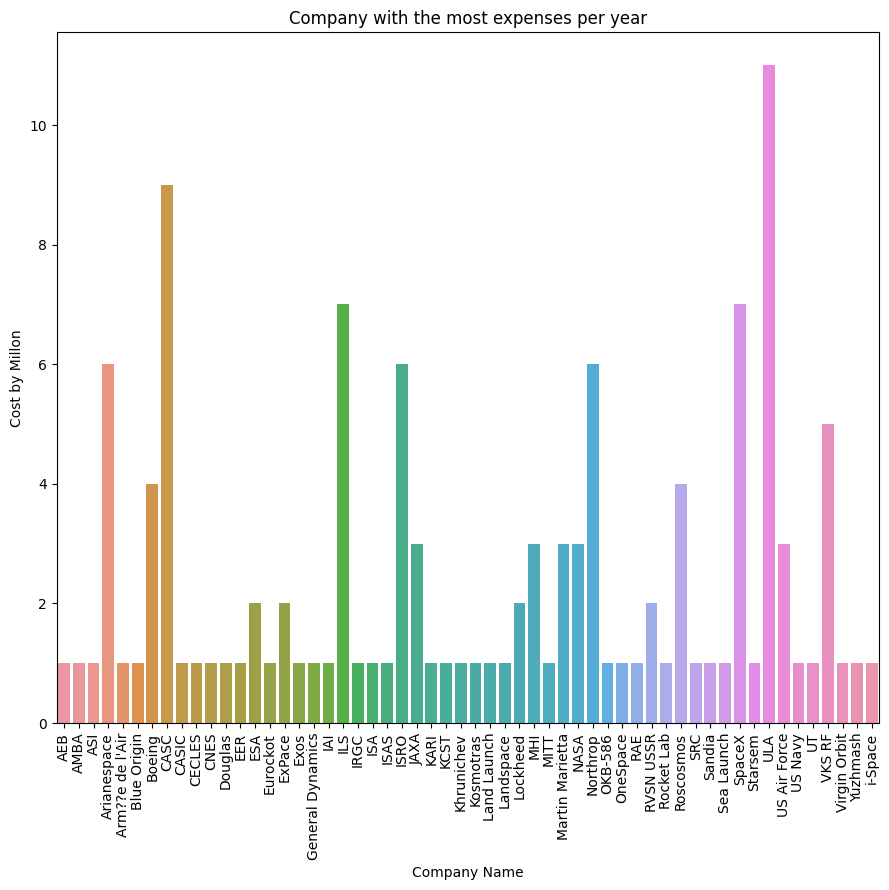

In [67]:
#company with the most expenses per year
company_spent = misiones.groupby(['Company Name'])[' Rocket'].nunique().reset_index()

company_spent.columns = [
    'Company Name', 
    'Cost by Millon'
]

plt.figure(figsize=(9, 9))  # Ajusta el tamaño del gráfico
sns.barplot(x='Company Name', y='Cost by Millon', data=company_spent)
plt.title('Company with the most expenses per year')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()


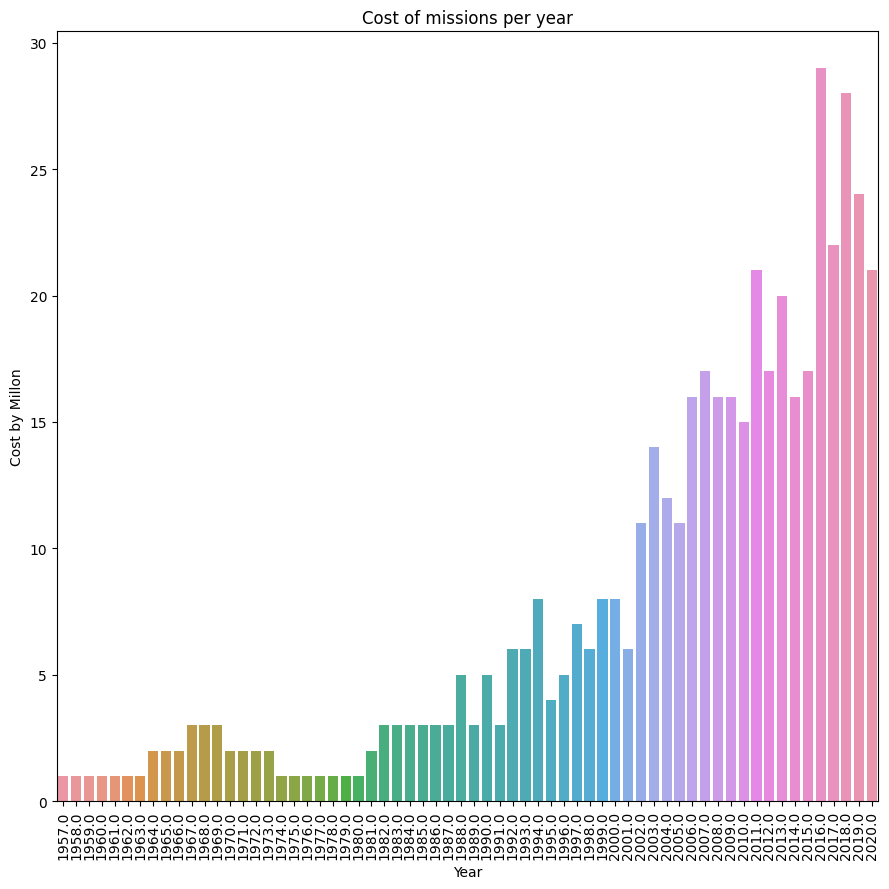

In [68]:
#cost of missions per year
year_spent = misiones.groupby(['year'])[' Rocket'].nunique().reset_index()

year_spent.columns = [
    'Year', 
    'Cost by Millon'
]

plt.figure(figsize=(9, 9))  # Ajusta el tamaño del gráfico
sns.barplot(x='Year', y='Cost by Millon', data=year_spent)
plt.title('Cost of missions per year')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()


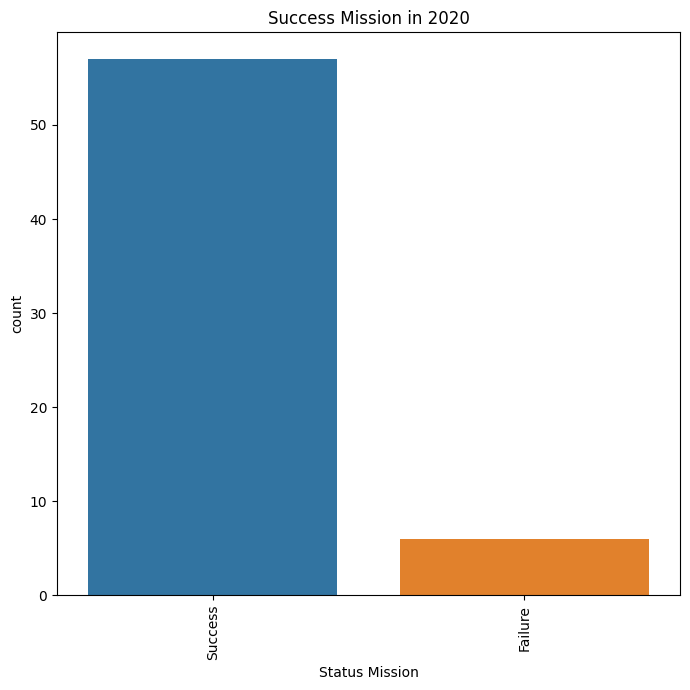

In [70]:
#misions succes in 2020
mision2020 = misiones[misiones['year']== 2020]

mision2020g = mision2020.groupby(['Status Mission']).size().reset_index(name='count')

misiones2020g_sorted = mision2020g.sort_values(by='count', ascending=False)

plt.figure(figsize=(7, 7))  # Ajusta el tamaño del gráfico
sns.barplot(x='Status Mission', y='count', data=misiones2020g_sorted)
plt.title('Success Mission in 2020')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x
plt.tight_layout()  # Asegura que las etiquetas no se superpongan
plt.show()

Over the years, we can see that the missions became more expensive than in previous years, making it clear that technology was evolving and providing better resources and more expenses to companies. Thanks to this, the number of successful missions increased compared to the first missions in which the knowledge and technology is not the same as what we have today. This translates into a greater amount of losses or profits depending on the company. As well as investments lost or gained according to the status of the missions carried out by each company.

In [71]:
#create new table with name country and asign country names
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

misiones['country'] = misiones['Location'].str.split(', ').str[-1].replace(countries_dict)

In [72]:
misiones.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,month,weekday,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,4.0,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,3.0,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,1.0,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020.0,7.0,3.0,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,3.0,USA


In [73]:
#create new variable that contain filter for by USA and China for comparation
china_usa = misiones[((misiones['country'] == 'USA') | (misiones['country'] == 'China'))]
china_usa.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,month,weekday,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020.0,8.0,4.0,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020.0,8.0,3.0,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,2020-08-04 23:57:00+00:00,2020.0,8.0,1.0,USA
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020.0,7.0,3.0,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020-07-25 03:13:00+00:00,2020.0,7.0,5.0,China


In [74]:
#variable to compare the number of missions carried out by China and the USA
year_count = china_usa.groupby('year')['country'].value_counts()
year_count.head(10)

year    country
1957.0  USA         1
1958.0  USA        17
1959.0  USA        16
1960.0  USA        30
1961.0  USA        43
1962.0  USA        59
1963.0  USA        15
1964.0  USA        23
1965.0  USA        33
1966.0  USA        47
Name: count, dtype: int64

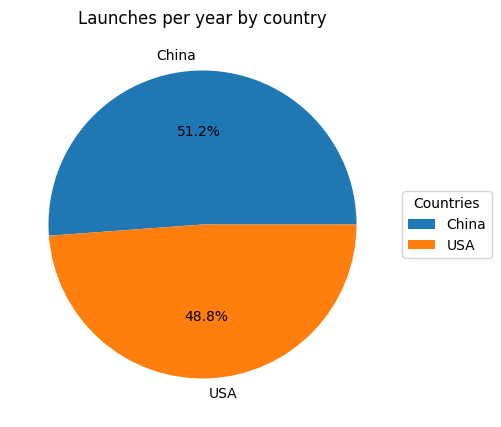

In [78]:
#pie chart to visualize the percentage of launches per year
year_count = china_usa[china_usa['year'] == 2020]

year_2020 = year_count.groupby(['country']).size().reset_index(name='count')

year_2020_sorted = year_2020.sort_values(by='count', ascending=False)

plt.figure(figsize=(5, 5))  # Ajusta el tamaño del gráfico
wedges, texts, autotexts = plt.pie(year_2020_sorted['count'], labels = year_2020_sorted['country'], autopct='%1.1f%%')
plt.title('Launches per year by country')
plt.legend(wedges, year_2020_sorted['country'],
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

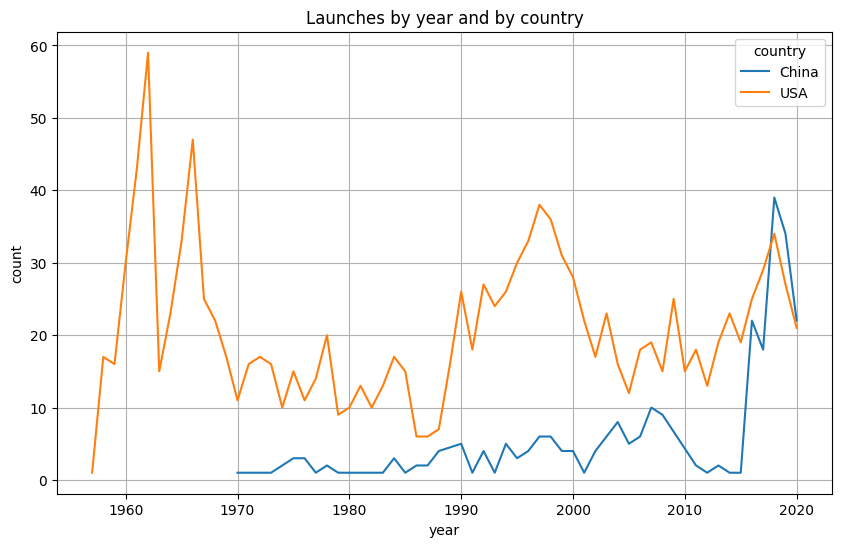

In [80]:
#line graph of launches by year and by country
comparacion = china_usa.groupby(['country', 'year']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.lineplot(x='year', y='count', hue='country', data=comparacion)
plt.title('Launches by year and by country')
plt.grid(True)
plt.show()

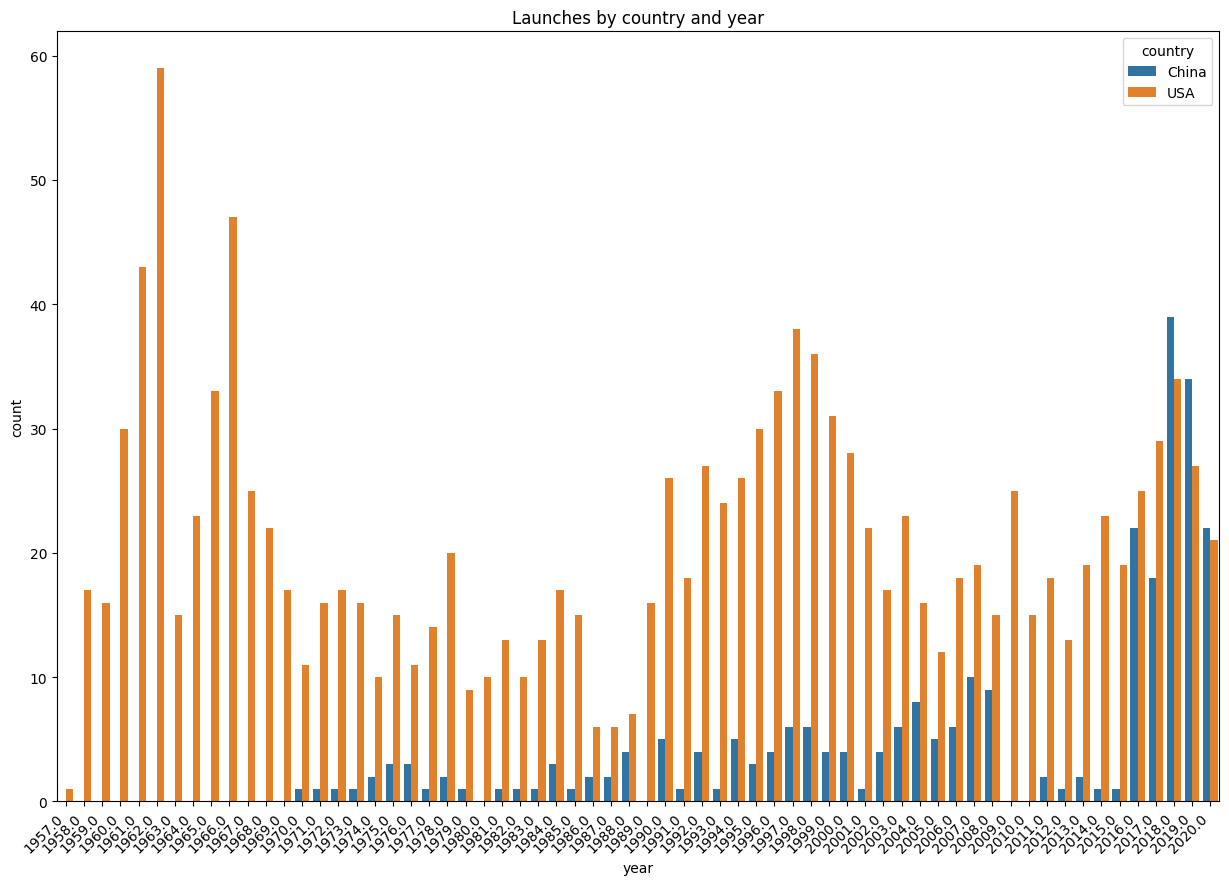

In [82]:
#comparation launches by country and year
comparacion_bar = china_usa.groupby(['country', 'year']).size().reset_index(name='count')

plt.figure(figsize=(15, 10))  # Ajusta el tamaño del gráfico
barplot = sns.barplot(x='year', y='count', hue='country', data=comparacion_bar)
plt.title('Launches by country and year')

# Coloca las etiquetas de manera horizontal y las separa para una mejor visualización
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

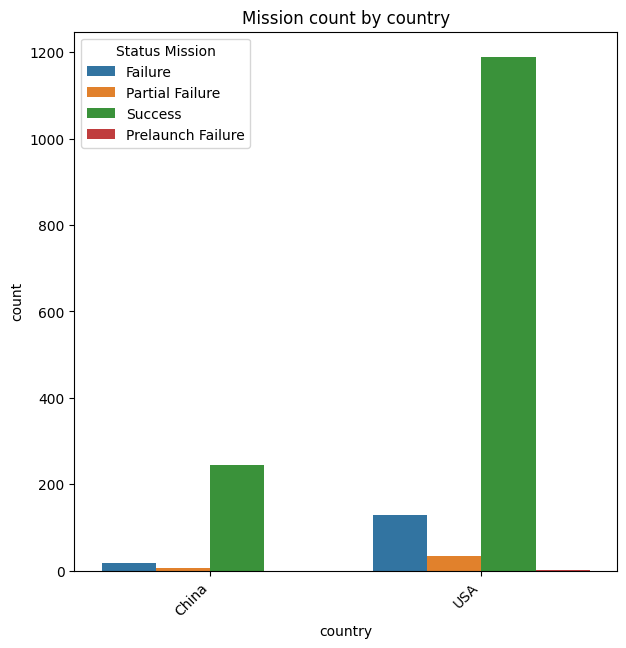

In [84]:
#mission count by country
comparacion_mission = china_usa.groupby(['country', 'Status Mission']).size().reset_index(name='count')

plt.figure(figsize=(7, 7))  # Ajusta el tamaño del gráfico
barplot = sns.barplot(x='country', y='count', hue='Status Mission', data=comparacion_mission)
plt.title('Mission count by country')

# Coloca las etiquetas de manera horizontal y las separa para una mejor visualización
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

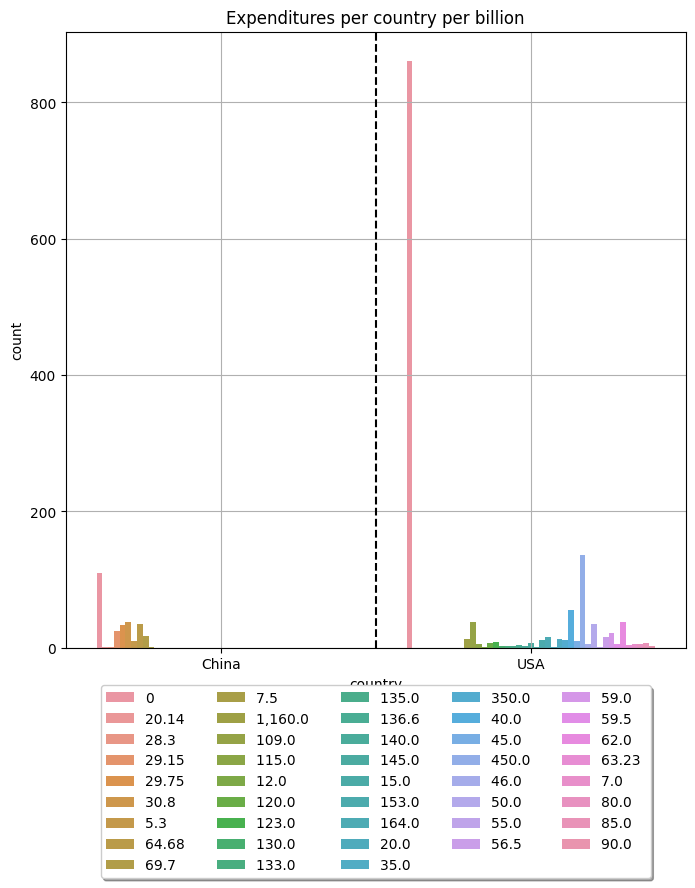

In [95]:
comparacion_spent = china_usa.groupby(['country', ' Rocket']).size().reset_index(name='count')

# Crear el gráfico de barras usando Seaborn
plt.figure(figsize=(8, 8))
barplot = sns.barplot(x='country', y='count', hue=' Rocket', data=comparacion_spent)

# Mover la leyenda debajo del gráfico y hacerla horizontal
barplot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

# Agregar una línea vertical para separar los países
plt.axvline(0.5, color='black', linestyle='--')

# Agregar una cuadrícula
plt.grid(True)

# Establecer el título del gráfico
plt.title('Expenditures per country per billion')

# Mostrar el gráfico
plt.show()


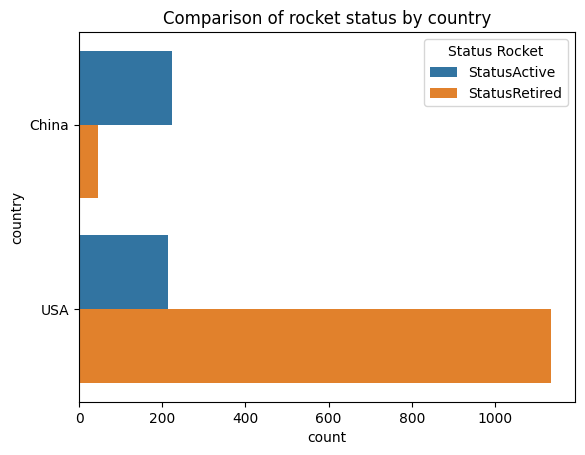

In [96]:
#comparison of rocket status by country

# Asumiendo que 'china_usa' es tu DataFrame
comparacion_rocket = china_usa.groupby(['country', 'Status Rocket']).size().reset_index(name='count')

# Crear una figura y un eje
fig, ax = plt.subplots()

# Crear un gráfico de barras con Seaborn
sns.barplot(x='count', y='country', hue='Status Rocket', data=comparacion_rocket, ax=ax)

# Establecer el título del gráfico
ax.set_title('Comparison of rocket status by country')

# Mostrar el gráfico
plt.show()


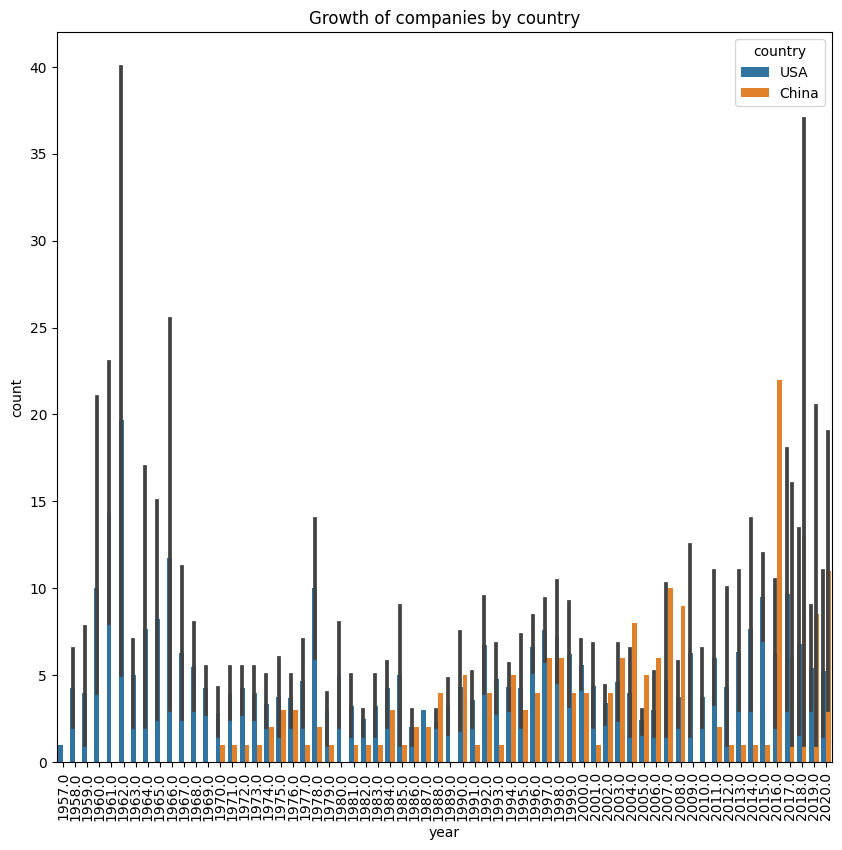

In [99]:
#growth of companies by country

# Asumiendo que 'china_usa' es tu DataFrame
comparacion_company = china_usa.groupby(['year', 'Company Name', 'country']).size().reset_index(name='count')

# Crear una figura y un eje con un tamaño más grande
fig, ax = plt.subplots(figsize=(10, 10))

# Crear un gráfico de barras con Seaborn
sns.barplot(x='year', y='count', hue='country', data=comparacion_company, ax=ax)

# Establecer el título del gráfico
ax.set_title('Growth of companies by country')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Ajustar los márgenes para evitar que las etiquetas se corten
plt.subplots_adjust(bottom=0.15)
plt.show()


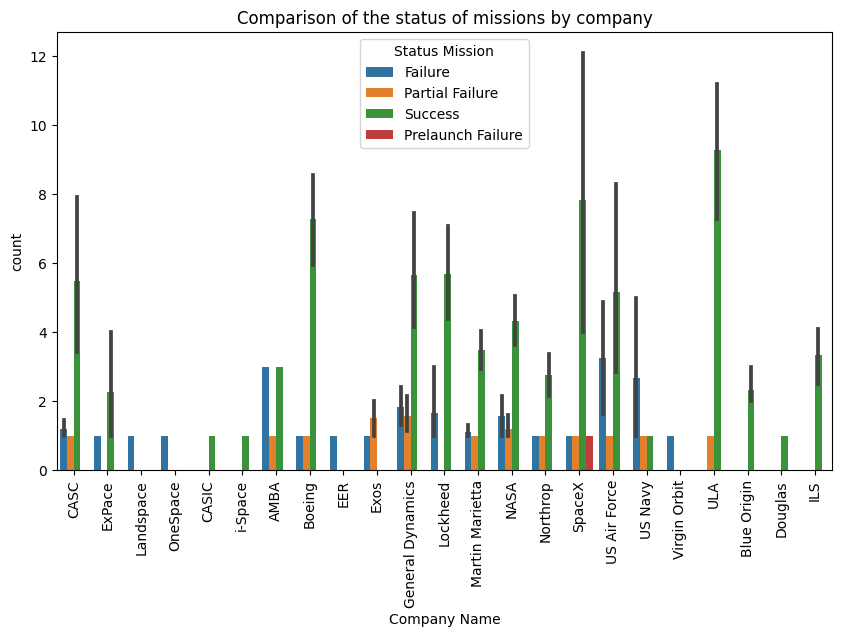

In [100]:
#Comparison of the status of missions by company

# Asumiendo que 'china_usa' es tu DataFrame
status_comparacion = china_usa.groupby(['country', 'Status Mission', 'Company Name', 'year']).size().reset_index(name='count')

# Crear una figura y un eje con un tamaño más grande
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un gráfico de barras con Seaborn
sns.barplot(x='Company Name', y='count', hue='Status Mission', data=status_comparacion, ax=ax)

# Establecer el título del gráfico
ax.set_title('Comparison of the status of missions by company')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Ajustar los márgenes para evitar que las etiquetas se corten
plt.subplots_adjust(bottom=0.15)
plt.show()


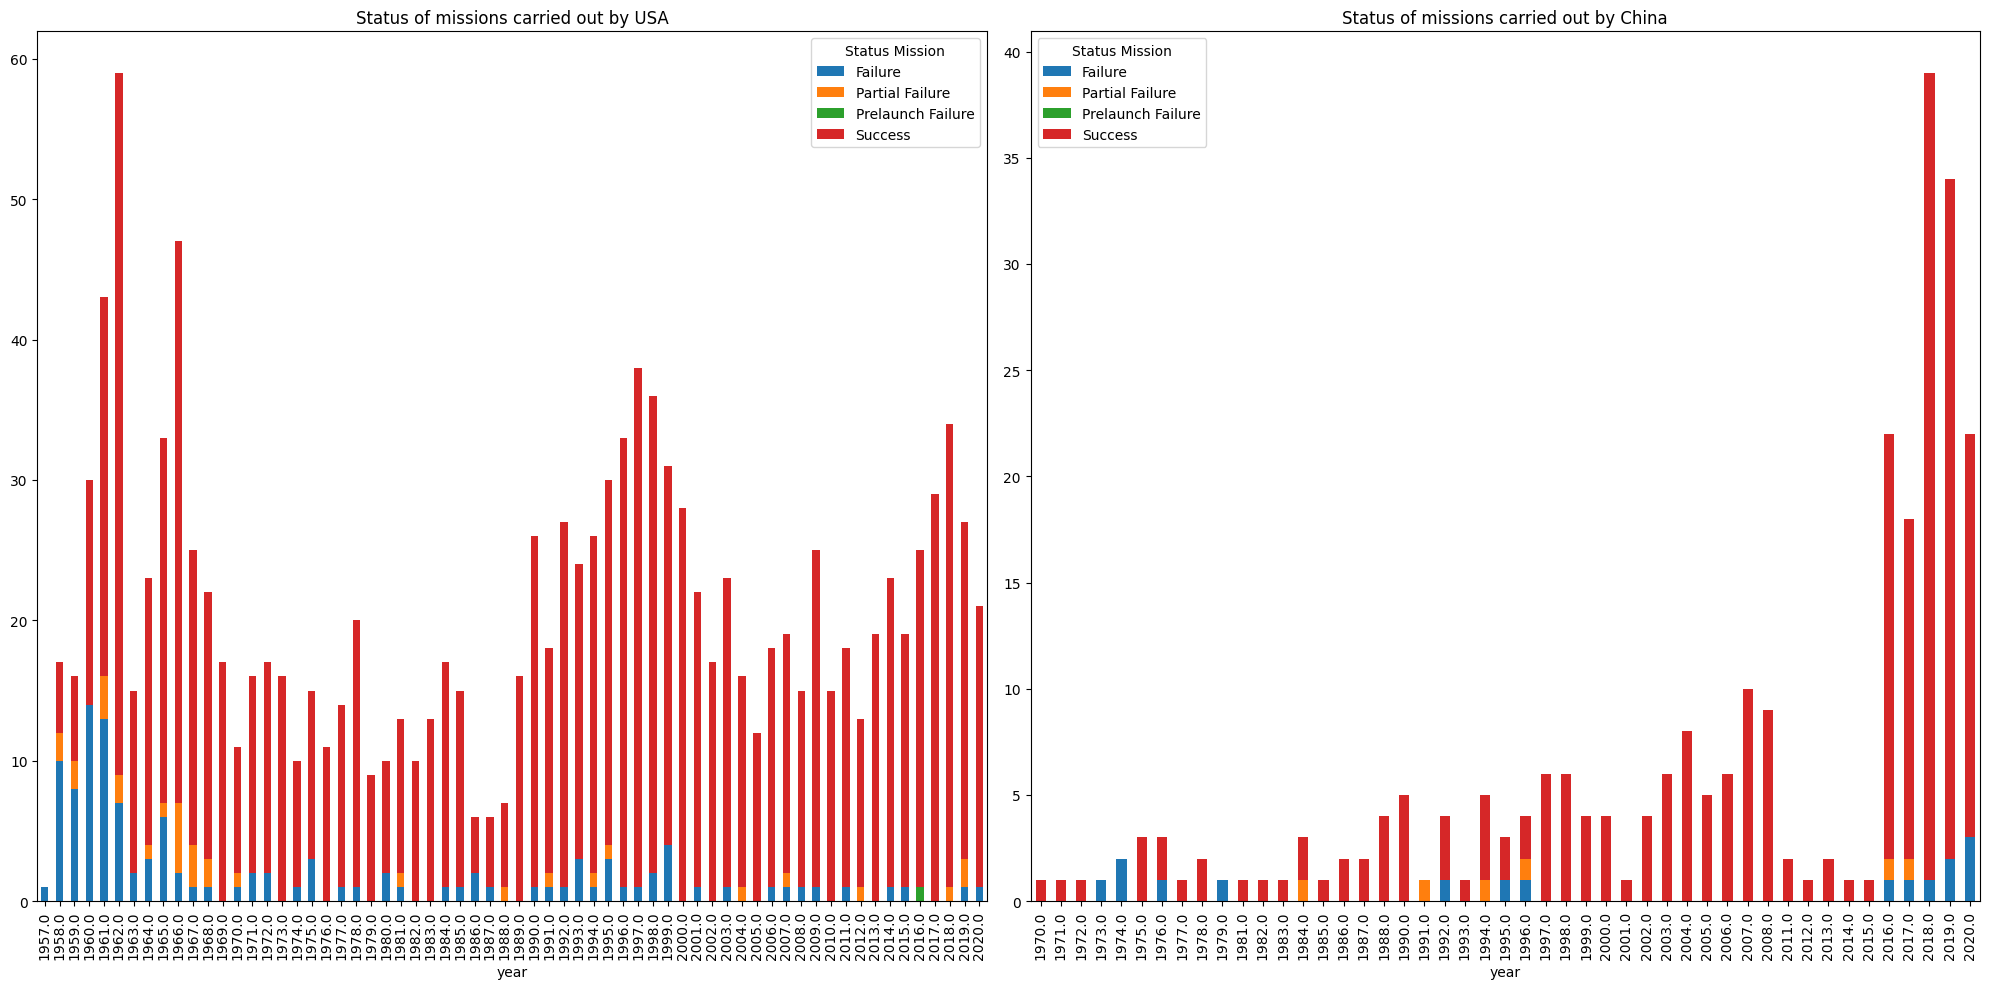

In [107]:
status_comparacion = china_usa.groupby(['year', 'Status Mission', 'country']).size().reset_index(name='count')

status_comparacion_pivot = status_comparacion.pivot_table(index=['year', 'country'], columns='Status Mission', values='count', fill_value=0)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Ajusta el tamaño del gráfico

for i, country in enumerate(status_comparacion['country'].unique()):
    df_country = status_comparacion_pivot.xs(country, level='country')
    df_country.plot(kind='bar', stacked=True, ax=axs[i], title=f'Status of missions carried out by {country}')
    axs[i].tick_params(axis='x', rotation=90)  # Rota las etiquetas del eje x a vertical

plt.tight_layout()  # Asegura que los gráficos no se superpongan
plt.show()


To finish this project where we made the comparison of 2 current powers. We can say that although USA started 10 years before China, that advantage was reduced over time, in turn also the cats by China were growing and that also leads to more missions compared to previous years. We can also determine that USA is the country that has more money invested in launches. Positioning this country as one of the great powers in relation to space missions, also in comparison with China is the country that had the largest growth of companies as well as the one that saw more companies grow in relation to rockets and missions that were carried out over time. But at the same time, having more rockets and more time in launching rockets, it also has more rockets out of service which could be interpreted as a loss of money compared to China which has much less rockets out of service, but also has less years and experience compared to USA.